# VGG-16 Network and Image Classification Task

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/09-VGG-16_network_and_classification.ipynb)

In this notebook, you can try out how convolutional neural networks actually work. We will use the VGG-16 network and test it in an image classification task. We have as many as 1000 classes at our disposal!

At the very beginning, we will load the standard libraries needed for further work.

In [10]:
%pip install pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Mejkerslab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Specifically, from the TensorFlow library we load the pre-trained VGG-16 model. When loading this model, we need to indicate that we want to use the model that was trained on images from the ImageNet dataset. We do this by setting the `weights` argument of the `VGG16` function to `imagenet`. The loading of the model itself may take a bit of time.

In [14]:
%pip install tensorflow
%pip install --upgrade numpy

from tensorflow.keras.applications import VGG16

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Mejkerslab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 162.5 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 186.2 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 238.1 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 231.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/12.9 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.6/12.9 MB 4.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.9 MB 10.5 MB/s eta 0:00:02
   ------------- -------------------------- 4.4/12.9 MB 18.7 MB/s eta 0:00:01
   ---------------------- ----------------- 7.3/12.9 MB 26.0 MB/s eta 0:00:01


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Mejkerslab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
model = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


Next, we will check the layers that make up this network. Don't be confused if you don't understand all the details displayed. It is important to know that the input is expected to be a 224x224 pixel color image (hence the 224, 224, 3 next to the input layer) and that the output is one of 1000 classes. You can compare the output with the VGG-16 model diagram we discussed to discover more information.

In [16]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

We can see that the number of parameters of this network is over 138 million. We will not train the network, but we will only use the pre-trained model. Therefore, it is important not to change the model parameters during operation - each one has its own contribution.

The idea is to test the network with an arbitrary image from the web. To achieve this, we will use a couple of libraries. The PIL library is the standard Python library for working with images, while we will use the urllib and io libraries to load the image.

In [17]:
from PIL import Image
from urllib import request
from io import BytesIO

The `load_image` function will help us fetch any image we want from the web. It is enough to provide it with the URL path.

In [19]:
def load_image(url_path):
    response = request.urlopen(url_path).read()
    return Image.open(BytesIO(response))

We have chosen an image of a golden retriever! By changing the path in the `image_url` variable, you can set the image you want.

In [20]:
image_url = 'https://images.unsplash.com/photo-1558788353-f76d92427f16?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=738&q=80' # https://unsplash.com/photos/x5oPmHmY3kQ
test_image = load_image(url_path=image_url)

Now we will display the loaded image.

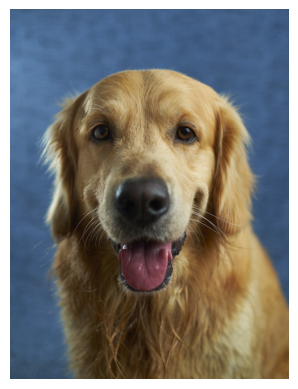

In [21]:
plt.imshow(test_image)
plt.axis('off')
plt.show()

When choosing an image, it is important to keep in mind that the class of the object in the image must be known to the model. Since the VGG-16 model is trained on over 1.2 million images, it recognizes a lot of objects, even 1000 different ones. As it has learned about the golden retriever, we can expect a good result. If we give the model an image with an object it does not recognize, it will give us predictions of classes whose images most resemble ours. We will see at the end which object classes resemble the golden retriever.

Since the image that we need to pass to the model needs to be specially prepared, the following section covers the preparations.

We will also load a couple of libraries that will make our work easier. It is common for the community to share all accompanying functionalities that are useful in these steps when sharing models.

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

First, we will prepare the image by setting its dimensions to 224x224 and specifying that it uses three color channels RGB.


In [23]:
test_image = test_image.resize((224, 224))
test_image = test_image.convert('RGB')

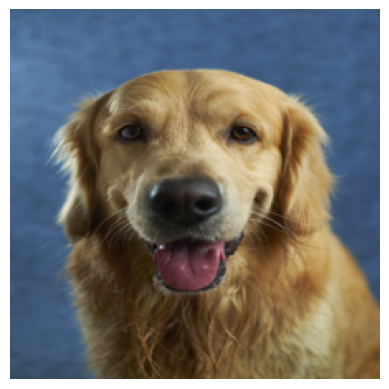

In [24]:
plt.imshow(test_image)
plt.axis('off')
plt.show()

Next, we will ensure that the image is in the appropriate matrix format.

In [25]:
matrix_form_test_image = image.img_to_array(test_image)
print(matrix_form_test_image.shape)

(224, 224, 3)


As you know, networks always work with data batches. Therefore, we will create a batch that contains our image. As you would expect, its dimension will be 1 x 224 x 224 x 3 because we have only one image in the batch.

In [26]:
batch = np.expand_dims(matrix_form_test_image, axis=0)
print(f'(number_of_test_images, height, width, number_of_channels) = {batch.shape}')

(number_of_test_images, height, width, number_of_channels) = (1, 224, 224, 3)


Next is the part that deals with numerical preprocessing of the image in the form of normalization. A special function `preprocess_input` that accompanies the model will help us with this.

In [27]:
test_image_batch = preprocess_input(batch)

Since we have finished the preparation, we can now use the model for the classification task. The function that will help us in this part is called `predict`.

In [28]:
model_predictions = model.predict(test_image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


The obtained model predictions represent the probabilities of our image belonging to each of the 1000 classes.

In [29]:
model_predictions.shape

(1, 1000)

To extract the class to which our image belongs, we can use the `decode_predictions` function, which will return the probabilities and names of the 5 most likely classes. This will give us insight into how confident the model is during classification.

In [30]:
most_likely_classes = decode_predictions(model_predictions)[0]
print(most_likely_classes)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
[('n02099601', 'golden_retriever', np.float32(0.806247)), ('n02099267', 'flat-coated_retriever', np.float32(0.025094718)), ('n02099712', 'Labrador_retriever', np.float32(0.018517474)), ('n04409515', 'tennis_ball', np.float32(0.01807036)), ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.013763103))]


As we can see, in the first place is the class *golden retriever* with a probability of 0.8042132. To better follow the model output, we can also display it graphically.

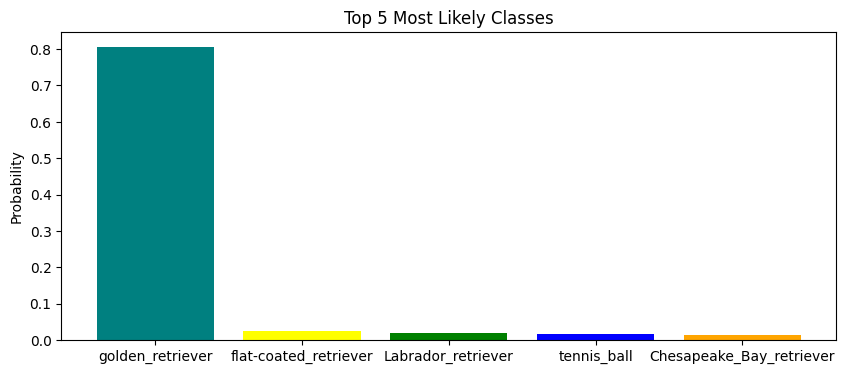

In [31]:
class_names = [item[1] for item in most_likely_classes]
class_probabilities = [item[2] for item in most_likely_classes]
plt.figure(figsize=(10, 4))
plt.bar(class_names, class_probabilities, color=['teal', 'yellow', 'green', 'blue', 'orange'])
plt.title('Top 5 Most Likely Classes')
plt.ylabel('Probability')
plt.show()

We see that the model has predicted with high confidence that the image we selected is a golden retriever. Some of the other classes the model considered are other types of retrievers. Interestingly, a tennis ball also appeared in the list of results. :)